In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [1]:
fname = 'LUCAS.csv'
df = pd.read_csv(fname, sep=',')

NameError: name 'pd' is not defined

# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [ ]:
df.describe()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,2906.000000,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,4.988986,2.001033,93.785223,0.281191
std,1677.635538,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,2.216791,1.398794,13.318904,0.714075
min,1.000000,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,1453.500000,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,3.000000,1.000000,98.203057,0.000000
50%,2906.000000,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,5.000000,2.000000,100.000000,0.000000
75%,4358.500000,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,6.000000,3.000000,100.000000,0.000000
max,5811.000000,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


In [ ]:
df[df['Anxiety'] == 1].describe()

KeyError: 'Anxiety'

<Axes: >

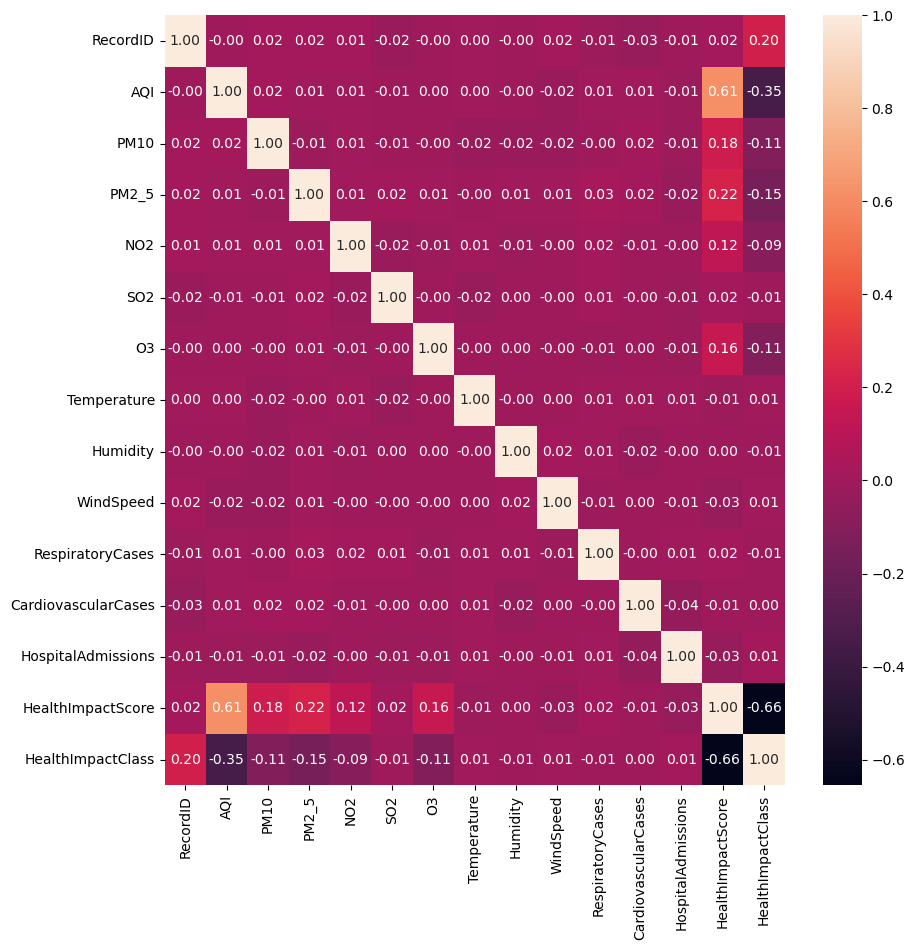

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)

### Making the Graph 


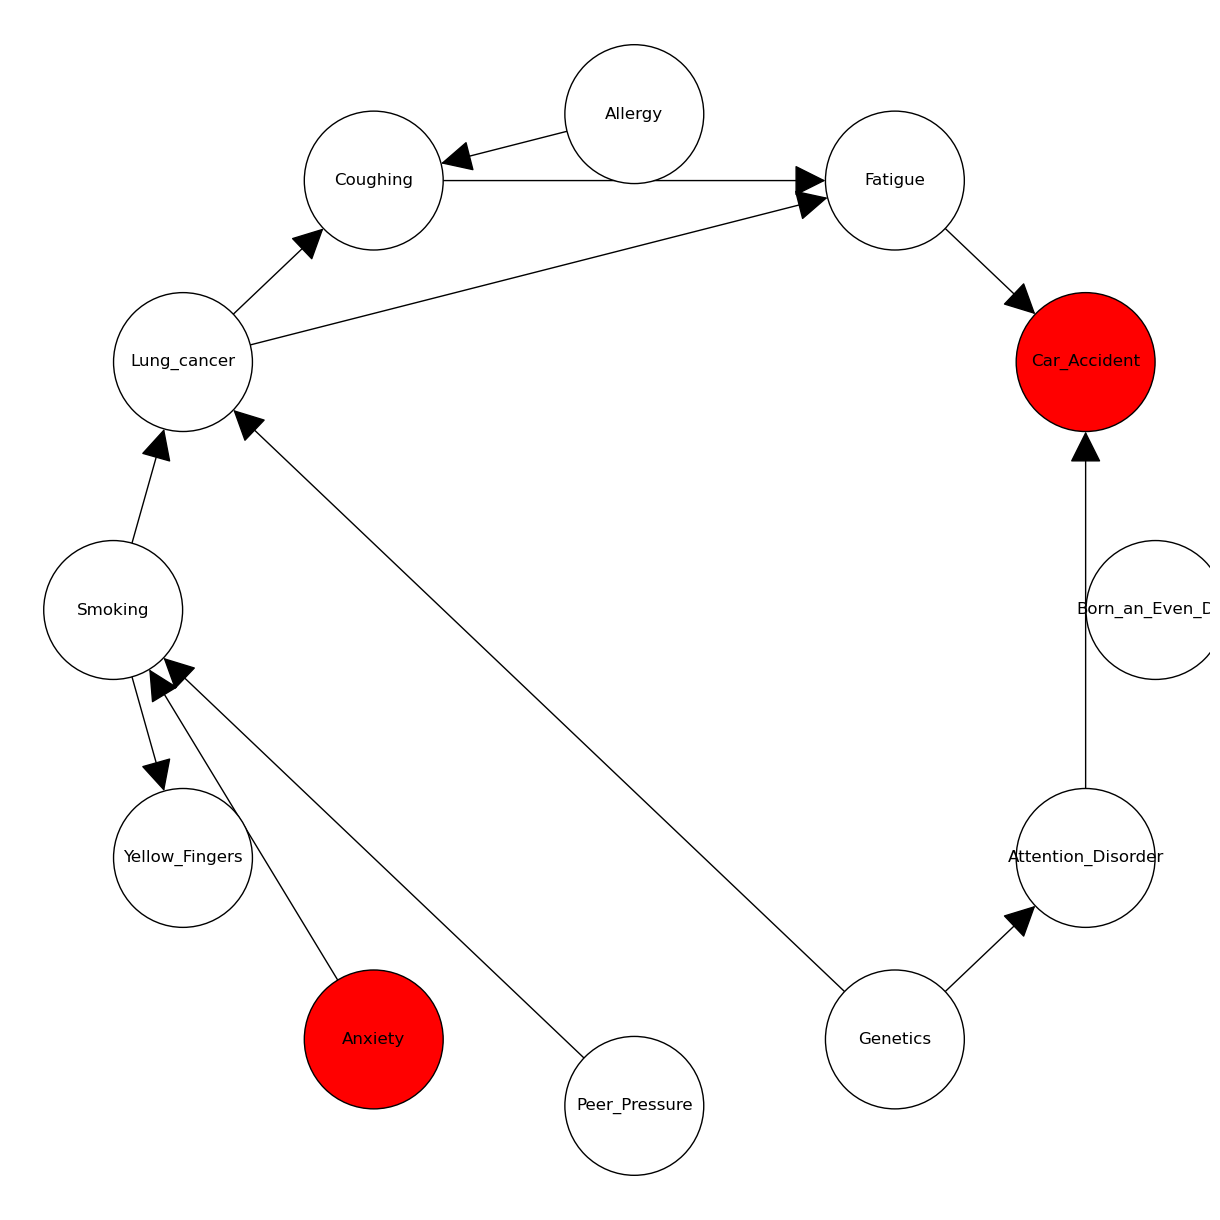

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(df.columns)
G.add_edges_from([('Anxiety', 'Smoking'),
                   ('Peer_Pressure', 'Smoking'),
                   ('Smoking', 'Yellow_Fingers'),
                   ('Smoking', 'Lung_cancer'),
                   ('Genetics', 'Lung_cancer'),
                   ('Genetics', 'Attention_Disorder'),
                   ('Lung_cancer', 'Fatigue'),
                   ('Lung_cancer', 'Coughing'),
                   ('Allergy', 'Coughing'),
                   ('Coughing', 'Fatigue'),
                   ('Attention_Disorder', 'Car_Accident'),
                   ('Fatigue', 'Car_Accident'),

                     ])
plt.figure(figsize=(12,12))

nx.draw_shell(G, with_labels=True, node_color = ['w', 'w', 'r', 'w', 'w', 'w', 'w', 'r', 'w', 'w', 'w', 'w'], arrowsize = 50, node_size = 10000, edgecolors='black', font_size=12)

In [ ]:
nx.write_gml(G, 'LUCAS.gml')

## Estimands

In [26]:
from dowhy.causal_identifier import backdoor
from dowhy import CausalModel

In [29]:
# a utility function to parse the .gml file to string 
# From tutorial 3
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str

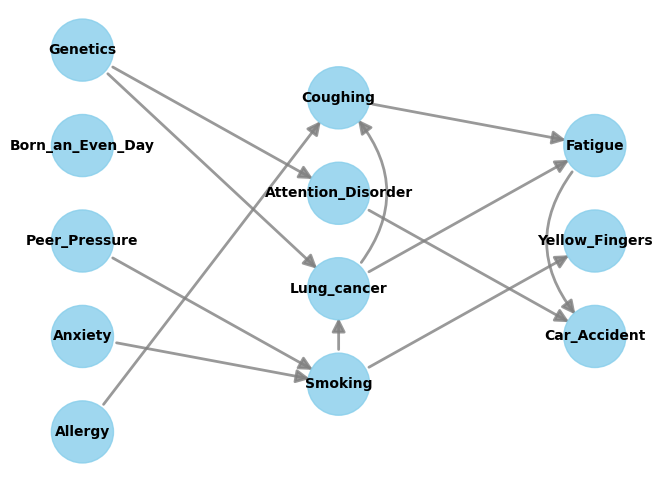

In [34]:
graph_str = gml_to_string('LUCAS.gml')

model=CausalModel(
    data = df,
    treatment='Anxiety',
    outcome='Car_Accident',
    graph=graph_str
)
model.view_model()

In [35]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                      
──────────(E[Car_Accident])
d[Anxiety]                 
Estimand assumption 1, Unconfoundedness: If U→{Anxiety} and U→Car_Accident then P(Car_Accident|Anxiety,,U) = P(Car_Accident|Anxiety,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡            d                                ∂                               ↪
E⎢──────────────────────────(Car_Accident)⋅──────────([Smoking  Yellow_Fingers ↪
 ⎣d[Smoking  Yellow_Fingers]               ∂[Anxiety]                          ↪

↪   ⎤
↪ ])⎥
↪   ⎦
Estimand assumption 1, Full-mediation: Smoking,Yellow_Fingers intercepts (blocks) all directed paths from Anxiety to C,a,r,_,A,c,c,i,d,e,n,t.
Estimand assumption 2, First-stage-unconfoundedness: If U→{Anxiety} and U→{Smoking,Yellow_Fingers} then P(Smoking,Yellow_Fingers|Anxiety,U) = 

In [36]:
identifier = model.identifier
identifier.identify_backdoor(model._graph._graph, model._treatment, model._outcome, list(model._graph.get_all_nodes(include_unobserved=False)))

[{'backdoor_set': set()},
 {'backdoor_set': ('Peer_Pressure',
   'Allergy',
   'Genetics',
   'Attention_Disorder')},
 {'backdoor_set': ('Peer_Pressure',)},
 {'backdoor_set': ('Allergy',)},
 {'backdoor_set': ('Genetics',)},
 {'backdoor_set': ('Attention_Disorder',)}]

## Estimating Causal Effect

In [47]:
from sklearn.linear_model import LinearRegression

In [52]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                      
──────────(E[Car_Accident])
d[Anxiety]                 
Estimand assumption 1, Unconfoundedness: If U→{Anxiety} and U→Car_Accident then P(Car_Accident|Anxiety,,U) = P(Car_Accident|Anxiety,)

## Realized estimand
b: Car_Accident~Anxiety+Anxiety*Peer_Pressure+Anxiety*Allergy+Anxiety*Genetics+Anxiety*Attention_Disorder
Target units: 

## Estimate
Mean value: 0.029664433911190446
### Conditional Estimates
__categorical__Peer_Pressure  __categorical__Allergy  __categorical__Genetics  __categorical__Attention_Disorder
(-0.001, 1.0]                 (-0.001, 1.0]           (-0.001, 1.0]            (-0.001, 1.0]                        0.029664
dtype: float64
Causal Estimate is 0.029664433911190446


/Users/jeremypalmerio/opt/miniconda3/envs/CDS/lib/python3.11/site-packages/dowhy/causal_estimator.py:266: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/Users/jeremypalmerio/opt/miniconda3/envs/CDS/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/Users/jeremypalmerio/opt/miniconda3/envs/CDS/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprec

In [57]:
# using the backdoor adjustment set and propensity score stratification
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="iv.instrumental_variable")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

Estimation failed! No relevant identified estimand available for this estimation method.
Causal Estimate is None


## Causal Discovery 

### PC algorithm 

In [96]:
from pgmpy.estimators import PC, ExpertKnowledge


In [100]:
alpha = 0.05
pc = PC(df)
pc_graph = pc.estimate(ci_test='pearsonr', return_type='cpdag', significance_level=alpha)


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RecordID': 'N', 'AQI': 'N', 'PM10': 'N', 'PM2_5': 'N', 'NO2': 'N', 'SO2': 'N', 'O3': 'N', 'Temperature': 'N', 'Humidity': 'N', 'WindSpeed': 'N', 'RespiratoryCases': 'N', 'CardiovascularCases': 'N', 'HospitalAdmissions': 'N', 'HealthImpactScore': 'N', 'HealthImpactClass': 'N'}


  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


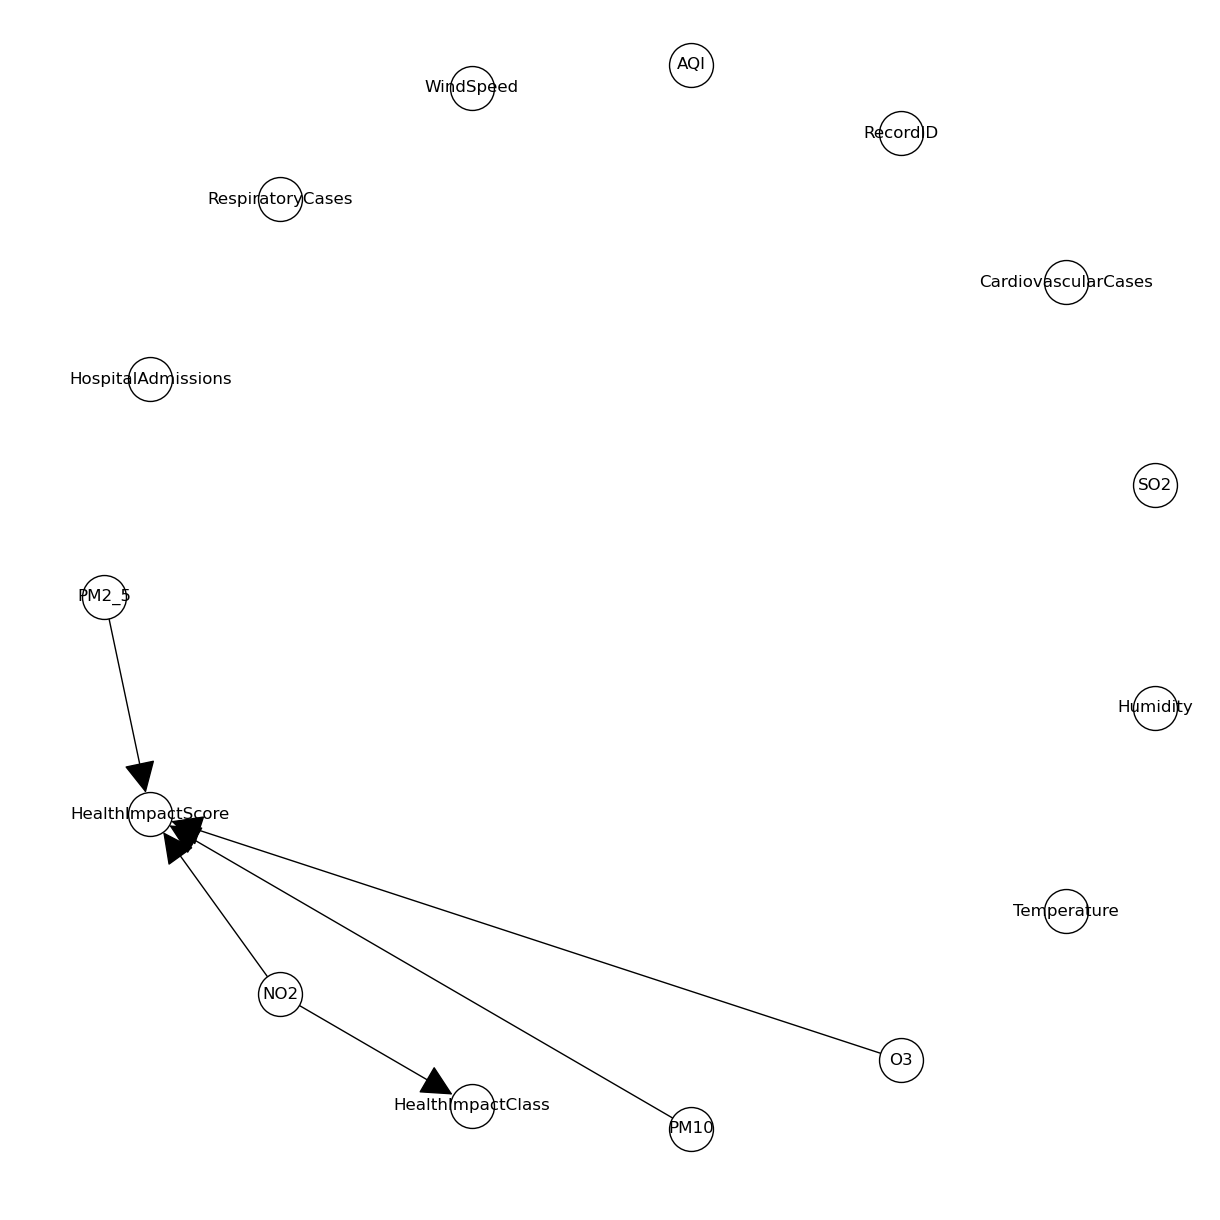

In [101]:
# Visualize the graph
plt.figure(figsize=(12,12))

colors = ['red'  if (y,x) in pc_graph.edges() else 'black' for (x,y) in pc_graph.edges()]
nx.draw_shell(pc_graph, with_labels=True, node_size=1000, font_size=12, arrowsize=50, node_color='w', edgecolors ='black', edge_color=colors)


INFO:dowhy.causal_model:Model to find the causal effect of treatment ['Anxiety'] on outcome ['Car_Accident']
INFO:dowhy.utils.plotting:Pygraphviz installation not found, falling back to networkx plotting. For better looking plots, consider installing pygraphviz. Note This requires both the Python pygraphviz package (``pip install pygraphviz``) and the shared system library (e.g. ``brew install graphviz`` or ``apt-get install graphviz``)


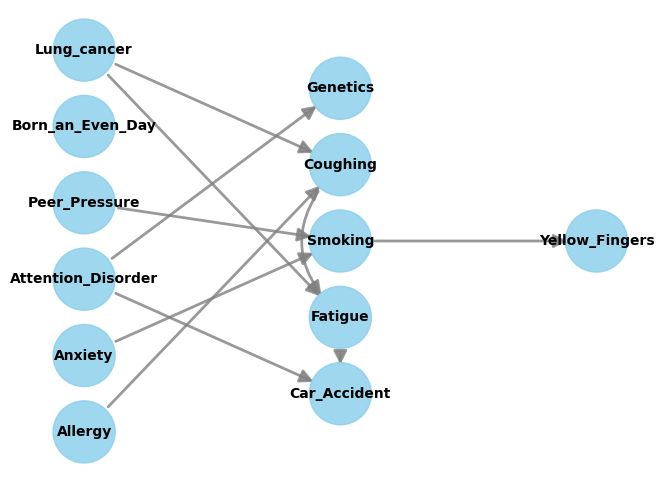

INFO:dowhy.causal_model:linear_regression
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator


No directed path from ['Anxiety'] to ['Car_Accident'] in the causal graph.
Causal effect is zero.
Causal Estimate is 0


In [70]:
gml = ''.join(nx.generate_gml(pc_graph))
model = CausalModel(
        data = df,
        treatment='Anxiety',
        outcome='Car_Accident',
        graph=gml)
model.view_model()

identified_estimand = model.identify_effect()
print(identified_estimand)

estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print("Causal Estimate is " + str(estimate.value))

### GES 

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Smoking': 'N', 'Yellow_Fingers': 'N', 'Anxiety': 'N', 'Peer_Pressure': 'N', 'Genetics': 'N', 'Attention_Disorder': 'N', 'Born_an_Even_Day': 'N', 'Car_Accident': 'N', 'Fatigue': 'N', 'Allergy': 'N', 'Coughing': 'N', 'Lung_cancer': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Smoking': 'N', 'Yellow_Fingers': 'N', 'Anxiety': 'N', 'Peer_Pressure': 'N', 'Genetics': 'N', 'Attention_Disorder': 'N', 'Born_an_Even_Day': 'N', 'Car_Accident': 'N', 'Fatigue': 'N', 'Allergy': 'N', 'Coughing': 'N', 'Lung_cancer': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Smoking': 'N', 'Yellow_Fingers': 'N', 'Anxiety': 'N', 'Peer_Pressure': 'N', 'Genetics': 'N', 'Attention_Disorder': 'N', 'Born_an_Even_Day': 'N', 'Car_Accident': 'N', 'Fatigue': 'N', 'Allergy': 'N', 'Coughing':

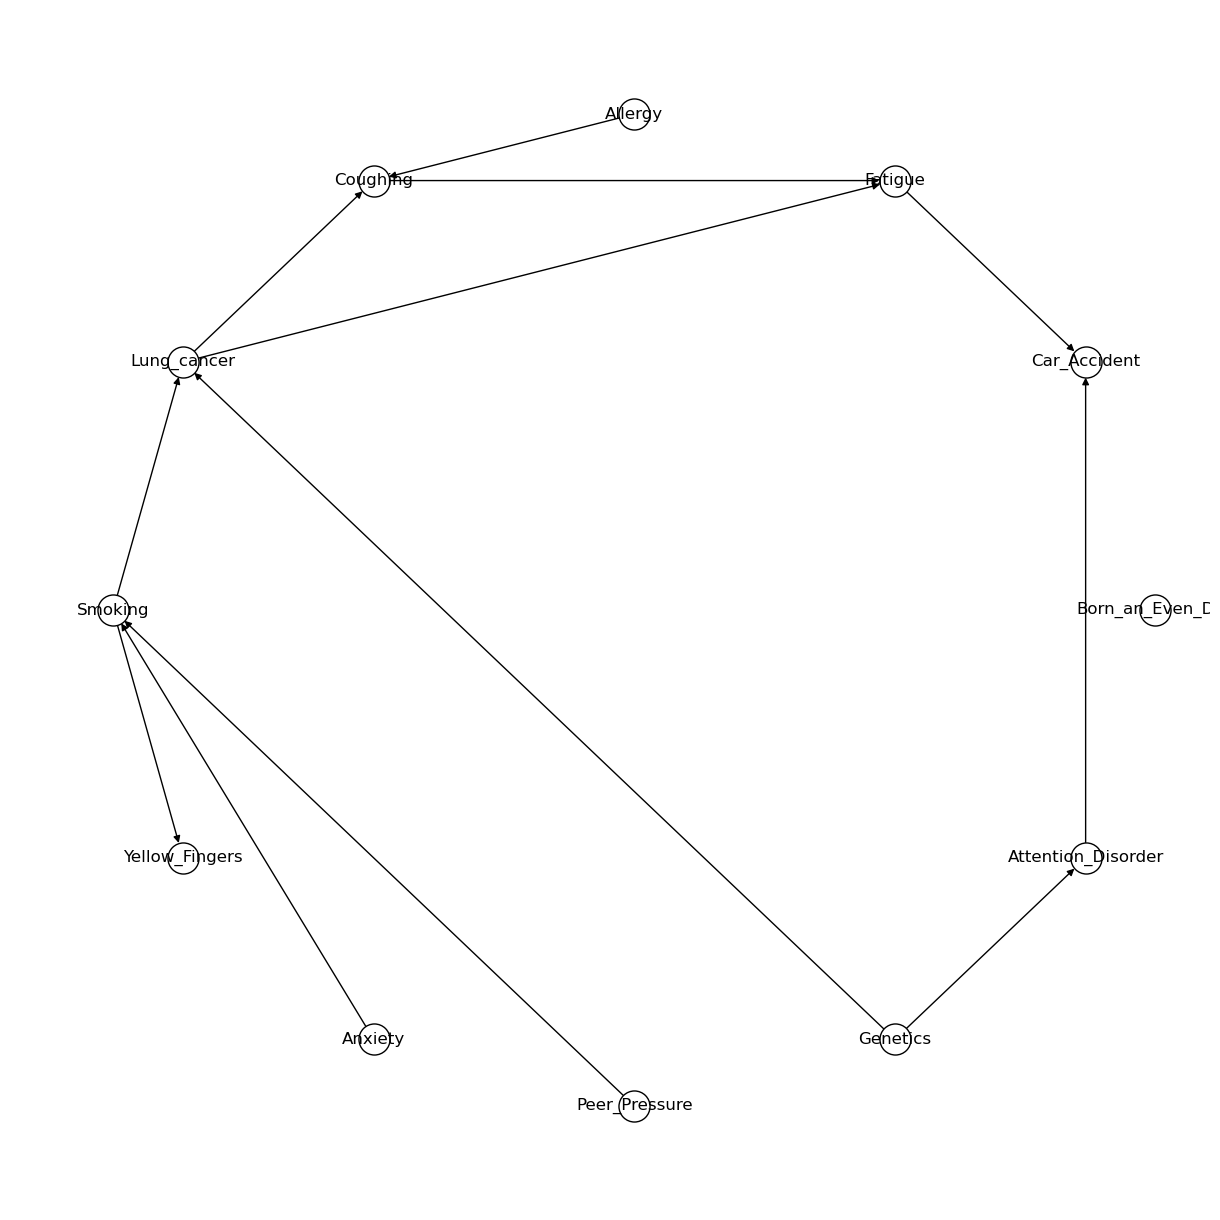

In [90]:
from pgmpy.estimators import GES as pgmpy_ges
from pgmpy.estimators import ExhaustiveSearch, HillClimbSearch, BDeu, BIC


ges_graph_pgmpy = pgmpy_ges(df).estimate(scoring_method='bic-g')
colors = ['red'  if (y,x) in ges_graph_pgmpy.edges() else 'black' for (x,y) in ges_graph_pgmpy.edges()]

plt.figure(figsize=(12,12))
nx.draw_shell(ges_graph_pgmpy, with_labels=True, node_size=500, node_color='w', edgecolors ='black', edge_color=colors)